In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 1. Load the dataset into python environment

In [2]:
data_df= pd.read_csv(r"C:\Users\DELNA ROSE\Downloads\titanic_dataset.csv")
data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2. Make ‘PassengerId’ as the index column

In [3]:
data=data_df.set_index('PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3. Check the basic details of the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. Fill in all the missing values present in all the columns in the dataset

In [6]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

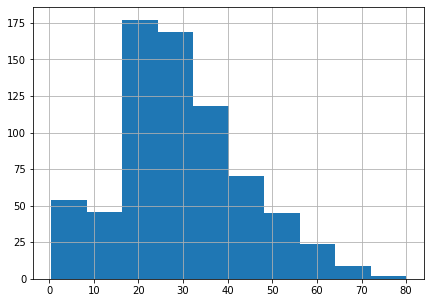

In [8]:
freq_graph=data.Age 
freq_graph.hist(figsize=(7,5))
plt.show()

In [9]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [10]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])


In [12]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

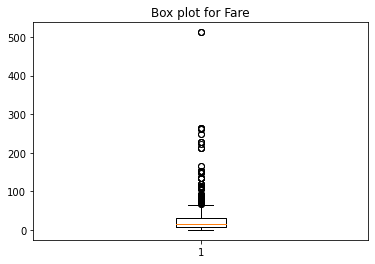

In [52]:
plt.boxplot(data['Fare'])
plt.title("Box plot for Fare")
plt.show()

# a. Fare

In [14]:
Q1=np.percentile(data["Fare"],25,interpolation="midpoint")
Q2=np.percentile(data["Fare"],50,interpolation="midpoint")
Q3=np.percentile(data["Fare"],75,interpolation="midpoint")

print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [15]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print(low_lim)
print(up_lim)

-26.724
65.6344


In [16]:
outlier=[]
for x in data["Fare"]:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [26]:
val1= [x for x in data['Fare']if x>low_lim and x<up_lim]
val1

[7.25,
 7.925,
 53.1,
 8.05,
 8.4583,
 51.8625,
 21.075,
 11.1333,
 30.0708,
 16.7,
 26.55,
 8.05,
 31.275,
 7.8542,
 16.0,
 29.125,
 13.0,
 18.0,
 7.225,
 26.0,
 13.0,
 8.0292,
 35.5,
 21.075,
 31.3875,
 7.225,
 7.8792,
 7.8958,
 27.7208,
 7.75,
 10.5,
 52.0,
 7.2292,
 8.05,
 18.0,
 11.2417,
 9.475,
 21.0,
 7.8958,
 41.5792,
 7.8792,
 8.05,
 15.5,
 7.75,
 21.6792,
 17.8,
 39.6875,
 7.8,
 26.0,
 35.5,
 10.5,
 7.2292,
 27.75,
 46.9,
 7.2292,
 27.9,
 27.7208,
 15.2458,
 10.5,
 8.1583,
 7.925,
 8.6625,
 10.5,
 46.9,
 14.4542,
 7.65,
 7.8958,
 8.05,
 29.0,
 12.475,
 9.0,
 9.5,
 7.7875,
 47.1,
 10.5,
 15.85,
 34.375,
 8.05,
 8.05,
 8.05,
 7.8542,
 20.575,
 7.25,
 8.05,
 34.6542,
 23.0,
 26.0,
 7.8958,
 7.8958,
 8.6542,
 7.925,
 7.8958,
 7.65,
 7.775,
 7.8958,
 24.15,
 52.0,
 14.4542,
 8.05,
 9.825,
 14.4583,
 7.925,
 7.75,
 21.0,
 31.275,
 8.05,
 30.0708,
 13.0,
 11.2417,
 7.75,
 7.1417,
 22.3583,
 6.975,
 7.8958,
 7.05,
 14.5,
 26.0,
 13.0,
 15.0458,
 26.2833,
 53.1,
 9.2167,
 15.2458,
 7.

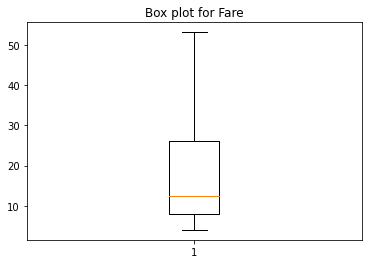

In [27]:
plt.boxplot(val1)
plt.title("Box plot for Fare")
plt.show()

# b. Age

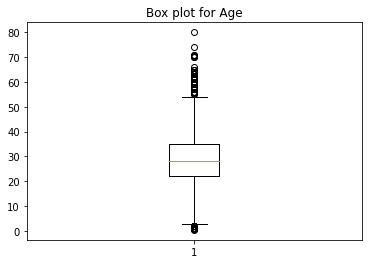

In [19]:
plt.boxplot(data[['Age']])
plt.title("Box plot for Age")
plt.show()

In [20]:
Q1=np.percentile(data["Age"],25,interpolation="midpoint")
Q2=np.percentile(data["Age"],50,interpolation="midpoint")
Q3=np.percentile(data["Age"],75,interpolation="midpoint")

print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [21]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print(low_lim)
print(up_lim)

2.5
54.5


In [22]:
outlier=[]
for x in data["Age"]:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [47]:
val= [x for x in data['Age']if x>low_lim and x<up_lim]
val

[2.0,
 2.0,
 0.83,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 0.92,
 2.0,
 1.0,
 1.0,
 0.75,
 2.0,
 2.0,
 2.0,
 0.75,
 0.67,
 1.0,
 0.42,
 2.0,
 1.0,
 0.83]

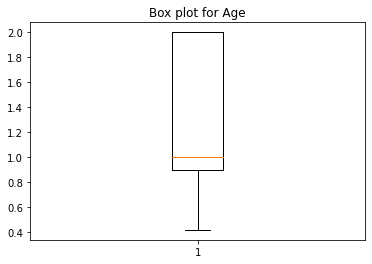

In [48]:
plt.boxplot(val)
plt.title("Box plot for Age")
plt.show()

# c.SibSp

In [40]:
Q1=np.percentile(data["SibSp"],25,interpolation="midpoint")
Q2=np.percentile(data["SibSp"],50,interpolation="midpoint")
Q3=np.percentile(data["SibSp"],75,interpolation="midpoint")

print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [41]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print(low_lim)
print(up_lim)

-1.5
2.5


In [42]:
outlier=[]
for x in data["SibSp"]:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [43]:
val3= [x for x in data['SibSp']if x>low_lim and x<up_lim]
val3

[1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,


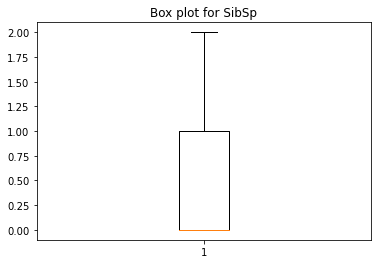

In [44]:
plt.boxplot(val3)
plt.title("Box plot for SibSp")
plt.show()

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [45]:
y=data['Survived']
x=data.drop('Survived',axis=1)
x=x.drop('Name',axis=1)
x=x.drop('Sex',axis=1)
x=x.drop('Ticket',axis=1)
x=x.drop('Cabin',axis=1)
x=x.drop('Embarked',axis=1)
x

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
2,1,38.0,1,0,71.2833
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
...,...,...,...,...,...
887,2,27.0,0,0,13.0000
888,1,19.0,0,0,30.0000
889,3,28.0,1,2,23.4500


In [49]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)
x=pd.DataFrame(x)
x

,0,1,2,3,4
0,1.0,0.271174,0.125,0.000000,0.014151
1,0.0,0.472229,0.125,0.000000,0.139136
2,1.0,0.321438,0.000,0.000000,0.015469
3,0.0,0.434531,0.125,0.000000,0.103644
4,1.0,0.434531,0.000,0.000000,0.015713
...,...,...,...,...,...
886,0.5,0.334004,0.000,0.000000,0.025374
887,0.0,0.233476,0.000,0.000000,0.058556
888,1.0,0.346569,0.125,0.333333,0.045771
889,0.0,0.321438,0.000,0.000000,0.058556


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print("MSE is:",mean_squared_error(y_test,predictions))
print("R squaredvalue is:",r2_score(y_test,predictions))

MSE is: 0.1869278524055185
R squaredvalue is: 0.2291691996235239
